# Projet Data Analysis : Prédiction des Feux de Forêt (Algérie)

**Objectif :** Créer un modèle de Machine Learn

# 1. Importation des librairies.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Chargement des données.

In [97]:
# header=1 signifie qu'on utilise la 2ème ligne comme en-têtes
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [101]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3. Nettoyage des données.

In [76]:
# 2. Nettoyage des noms de colonnes (enlève les espaces vides autour des noms)
df.columns = df.columns.str.strip()

In [77]:
# 3. Suppression des lignes vides
df = df[df['day'] != 'day']  # On enlève les lignes où 'day' est écrit dans la colonne data
df = df.dropna().reset_index(drop=True) # On enlève les lignes vides

In [78]:
# 4. Conversion des types de données
# on convertit les colonnes numériques
cols_numeriques = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in cols_numeriques:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [79]:
# Affichage pour vérifier
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [80]:
# 1. Nettoyage de la colonne 'Classes' (enlever les espaces)
df['Classes'] = df['Classes'].str.strip()

In [81]:
# Si "not" est dans le mot (ex: "not fire"), c'est 0. Sinon, c'est 1.
df['Binary_Class'] = df['Classes'].apply(lambda x: 0 if 'not' in x else 1)

In [82]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Binary_Class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


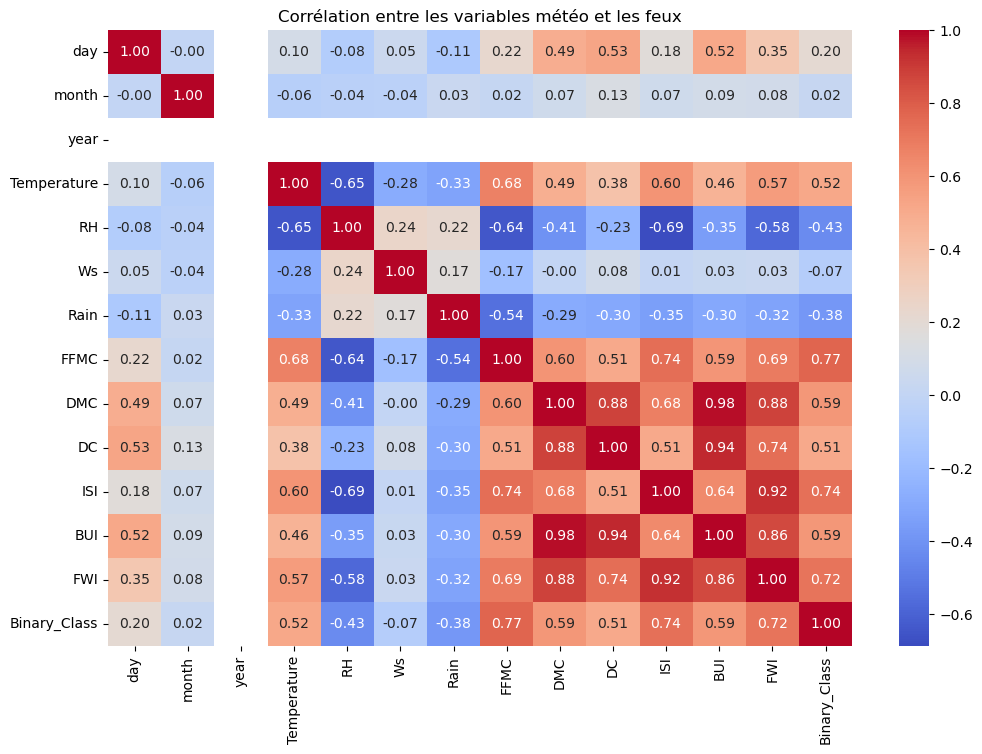

In [95]:
# 3. Visualisation : Matrice de corrélation
# Pour voir quels facteurs sont les plus liés au feu
plt.figure(figsize=(12, 8))
# On exclut la colonne texte 'Classes' pour la corrélation
sns.heatmap(df.drop(columns=['Classes']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables météo et les feux")
plt.show()

# 4. Préparation des données pour l'apprentissage

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [85]:
# 1. Séparation des données
# X = les indices météo (les ingrédients)
# y = la cible (Feu ou Pas Feu)
X = df.drop(columns=['Classes', 'Binary_Class', 'day', 'month', 'year']) # On enlève les dates et la réponse
y = df['Binary_Class']

# On garde 20% des données pour tester le modèle à la fin (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# 2. Création et Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# 3. Prédictions sur les données de test
predictions = model.predict(X_test)

In [88]:
# 4. Évaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {accuracy * 100:.2f}%")
print("\nRapport détaillé :")
print(classification_report(y_test, predictions))

Précision du modèle : 100.00%

Rapport détaillé :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        27

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [89]:
# 1. Récupération de l'importance des features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

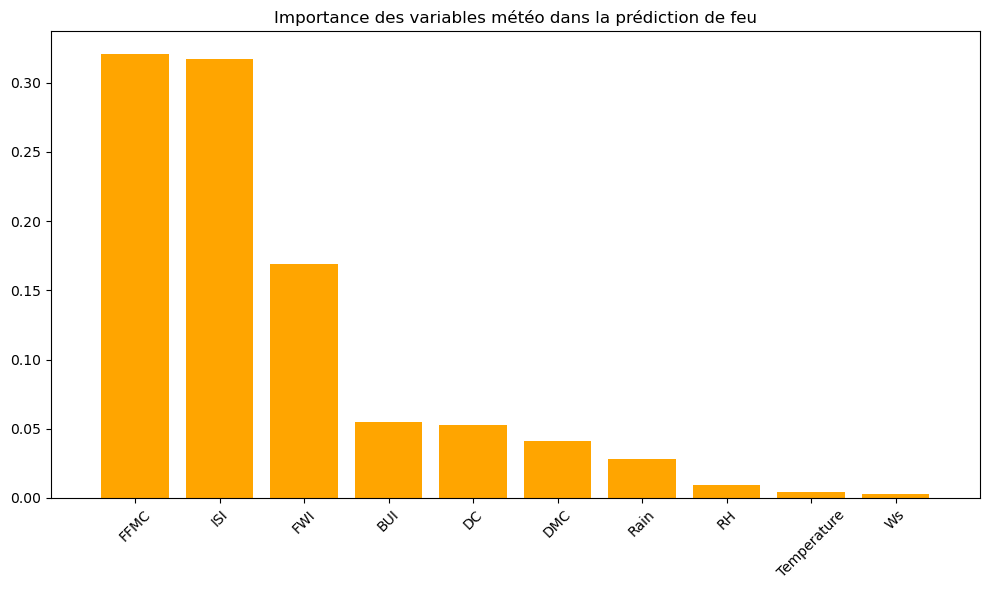

In [90]:
# 2. Visualisation
plt.figure(figsize=(10, 6))
plt.title("Importance des variables météo dans la prédiction de feu")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='orange')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

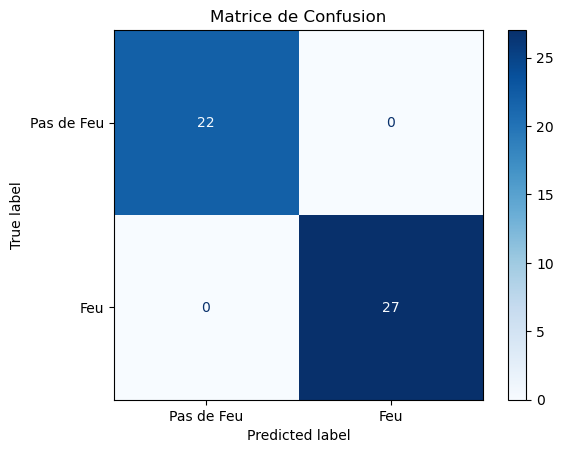

In [92]:
# Calcul de la matrice
cm = confusion_matrix(y_test, predictions, labels=[0, 1])

# Le reste ne change pas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pas de Feu", "Feu"])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

# Simulation 

In [93]:
# Créons une fausse journée météo (exemple : journée très chaude et sèche)
# Les valeurs doivent être dans le même ordre que tes colonnes d'entraînement (X)
# Exemple : Temp=35, RH=40, Ws=15, Rain=0, FFMC=88, DMC=20, DC=80, ISI=9, BUI=25, FWI=15
nouvelle_donnee = pd.DataFrame([[5, 10, 15, 0, 1, 20, 15, 9, 25, 1]], 
                               columns=X.columns)

# Prédiction
prediction = model.predict(nouvelle_donnee)
probabilite = model.predict_proba(nouvelle_donnee)

if prediction[0] == 1:
    print(f" ALERTE : Risque de feu détecté ! (Confiance : {probabilite[0][1]*100:.2f}%)")
else:
    print(f" Pas de risque de feu détecté. (Confiance : {probabilite[0][0]*100:.2f}%)")

✅ Pas de risque de feu détecté. (Confiance : 63.00%)


# Sauvegarde du modèle.

In [94]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ... (ton code de chargement et nettoyage de données reste identique) ...

# Supposons que X et y sont définis ici
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df['Binary_Class']

# 1. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Création et ajustement du Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Entraînement du modèle (sur les données SCALÉES)
model.fit(X_train_scaled, y_train)

# --- MODIFICATION ICI ---
# 4. Sauvegarde du Modèle ET du Scaler
joblib.dump(model, 'modele_foret.pkl')
joblib.dump(scaler, 'scaler.pkl')  # On sauvegarde aussi l'outil de mise à l'échelle

print("✅ Modèle et Scaler sauvegardés avec succès !")

✅ Modèle et Scaler sauvegardés avec succès !
